In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [7]:
df.shape

(10000, 11)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

C:\Users\Ayush R\AppData\Local\Temp\ipykernel_17608\2292856915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
C:\Users\Ayush R\AppData\Local\Temp\ipykernel_17608\2292856915.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gende

In [11]:
df1 = pd.get_dummies(data=df, columns=['Geography'])

In [12]:
df1.shape

(10000, 13)

In [13]:
col = ['Geography_France', 'Geography_Germany', 'Geography_Spain']
for i in col:
    df1[i].replace({True: 1, False: 0}, inplace=True)

C:\Users\Ayush R\AppData\Local\Temp\ipykernel_17608\44622015.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[i].replace({True: 1, False: 0}, inplace=True)
C:\Users\Ayush R\AppData\Local\Temp\ipykernel_17608\44622015.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[i].replace({True: 1,

In [14]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [15]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [16]:
scale_col = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_col] = scaler.fit_transform(df1[scale_col])

In [17]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [18]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [19]:
X_train.shape

(8000, 12)

In [20]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,0,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,1,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,0,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,0,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,1,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,0,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,0,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,0,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,1,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,1,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [22]:
import tensorflow as tf
from tensorflow import keras 

model = keras.Sequential([
    keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(3, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 50)

Epoch 1/50


c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.7912 - loss: 0.5408
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.7877 - loss: 0.4954
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8031 - loss: 0.4558
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.7995 - loss: 0.4555
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.8035 - loss: 0.4559
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.8152 - loss: 0.4318
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.8112 - loss: 0.4288
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.8207 - loss: 0.4180
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8170 - loss: 0.4253
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.8299 - loss: 0.3934
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.8302 - loss: 0.3931
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 

In [23]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8536 - loss: 0.3535


[0.3514925241470337, 0.8535000085830688]

In [24]:
yp = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


In [25]:
y_pred = []
for i in yp:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [26]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [27]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1760
           1       0.43      0.73      0.55       240

    accuracy                           0.85      2000
   macro avg       0.70      0.80      0.73      2000
weighted avg       0.90      0.85      0.87      2000

[[1531  229]
 [  64  176]]


Text(70.72222222222221, 0.5, 'Truth')

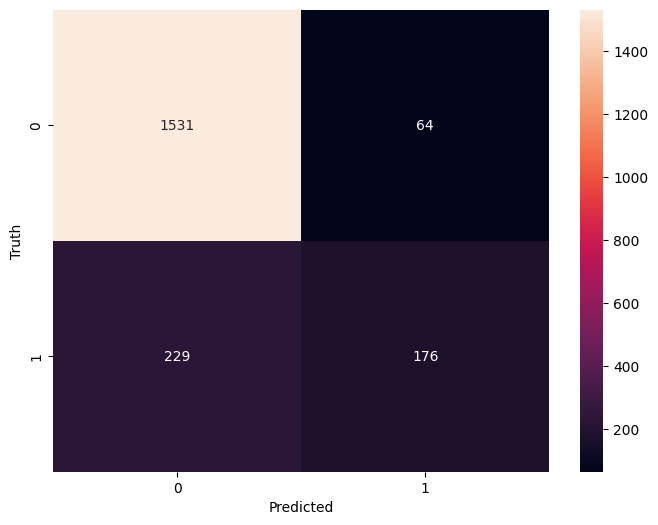

In [29]:
import seaborn as sn
from matplotlib import pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model1 = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12,), activation='relu'),
        keras.layers.Dense(4, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model1.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model1.fit(X_train, y_train, epochs=100)
    else:
        model1.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model1.evaluate(X_test, y_test))
    
    y_preds = model1.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [31]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)
y_preds = np.round(y_preds)

Epoch 1/100


c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.7867 - loss: 0.5517
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.7990 - loss: 0.4778
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.8082 - loss: 0.4603
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.8119 - loss: 0.4516
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.8122 - loss: 0.4440
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.8119 - loss: 0.4385
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.8152 - loss: 0.4323
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.8184 - loss: 0.4303
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8204 - loss: 0.4242
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8228 - loss: 0.4202
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.8245 - loss: 0.4178
Epoch 12/100
250/250 ━━━━━━━━━━

In [32]:
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91      1760
         1.0       0.42      0.71      0.53       240

    accuracy                           0.85      2000
   macro avg       0.69      0.79      0.72      2000
weighted avg       0.89      0.85      0.86      2000



## Since, Dataset is imbalanced, we would use some techniques to try making it balanced

In [33]:
df1.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

So, here 0 has a lot of data over 1 and that's why ouor F1-score for 1 is much less than that of 0

1. Under Sampling

In [34]:
count_0, count_1 = df1.Exited.value_counts()

df_class_0 = df1[df1.Exited == 0]
df_class_1 = df1[df1.Exited == 1]

df_class_0_undersample = df_class_0.sample(count_1)
df_under = pd.concat([df_class_0_undersample, df_class_1], axis = 0)
df_under.Exited.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [35]:
X = df_under.drop('Exited', axis = 1)
y = df_under.Exited

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
y_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

In [37]:
y_pred_under = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)
y_pred_under = np.round(y_pred_under)

Epoch 1/100


c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.5034 - loss: 0.6894
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.5979 - loss: 0.6776
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.6452 - loss: 0.6547
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.6617 - loss: 0.6235
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.6630 - loss: 0.6191
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.6795 - loss: 0.6013
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.6664 - loss: 0.6110
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.6802 - loss: 0.6006
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.6840 - loss: 0.5933
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.6797 - loss: 0.5949
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.7005 - loss: 0.5817
Epoch 12/100
102/102 ━━━━━━━━━━

In [38]:
print(classification_report(y_pred_under, y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.75       381
         1.0       0.79      0.74      0.76       434

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



2. OverSampling

In [39]:
df_class_1_oversample = df_class_1.sample(count_0, replace=True)

df_oversample = pd.concat([df_class_1_oversample, df_class_0], axis = 0)
df_oversample.Exited.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [40]:
X_oversample = df_oversample.drop('Exited', axis = 1)
y_oversample = df_oversample.Exited

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.2, random_state=42, stratify=y_oversample)

In [41]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [42]:
y_pred_oversample = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)
y_pred_oversample = np.round(y_pred_oversample)

Epoch 1/100


c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.5203 - loss: 0.6922
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.6543 - loss: 0.6328
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.6845 - loss: 0.5954
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6966 - loss: 0.5830
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.7040 - loss: 0.5751
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7165 - loss: 0.5677
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.7275 - loss: 0.5518
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.7282 - loss: 0.5453
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.7357 - loss: 0.5303
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.7480 - loss: 0.5189
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7545 - loss: 0.5115
Epoch 12/100
399/399 ━━━━━━━━━━

In [43]:
print(classification_report(y_pred_oversample, y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      1582
         1.0       0.78      0.78      0.78      1604

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



3. SMOTE

In [54]:
X = df1.drop('Exited', axis = 1)
y = df1.Exited

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

Exited
1    6370
0    6370
Name: count, dtype: int64

In [59]:
y_pred_sm = ANN(X_sm, y_sm, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - accuracy: 0.5455 - loss: 0.6907
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.6547 - loss: 0.6280
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.6860 - loss: 0.5944
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.7070 - loss: 0.5665
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.7214 - loss: 0.5534
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.7194 - loss: 0.5493
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.7290 - loss: 0.5378
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.7454 - loss: 0.5216
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.7516 - loss: 0.5056
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.7499 - loss: 0.5097
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.7570 - loss: 0.4950
Epoch 12/100
399/399 ━━━━━━━━━━

In [61]:
y_pred_sm_updated = []
for i in y_pred_sm:
    if i > 0.35:
        y_pred_sm_updated.append(1)
    else:
        y_pred_sm_updated.append(0)

In [62]:
print(classification_report(y_pred_sm_updated, y_test))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1337
           1       0.76      0.47      0.58       663

    accuracy                           0.77      2000
   macro avg       0.77      0.70      0.71      2000
weighted avg       0.77      0.77      0.76      2000



So, here the SMOTE method worked the best for us, so we use the model using imbalanced dataset technique as SMOTE.

In [49]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12, ), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss = 'binary_crossentropy', 
    metrics=['accuracy']
)

model.fit(X_sm, y_sm, epochs=100)

Epoch 1/100


c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5488 - loss: 0.6861
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6439 - loss: 0.6504
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6817 - loss: 0.6087
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7222 - loss: 0.5562
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7310 - loss: 0.5399
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7469 - loss: 0.5228
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7535 - loss: 0.5174
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7526 - loss: 0.5072
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7590 - loss: 0.5039
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7709 - loss: 0.4832
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7665 - loss: 0.4849
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [63]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.7737 - loss: 0.4737


[0.49060243368148804, 0.7595000267028809]

In [64]:
y_pred = np.round(model.predict(X_test))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


In [65]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.74      0.94      0.83      1258
         1.0       0.82      0.45      0.58       742

    accuracy                           0.76      2000
   macro avg       0.78      0.70      0.71      2000
weighted avg       0.77      0.76      0.74      2000



Text(70.72222222222221, 0.5, 'Truth')

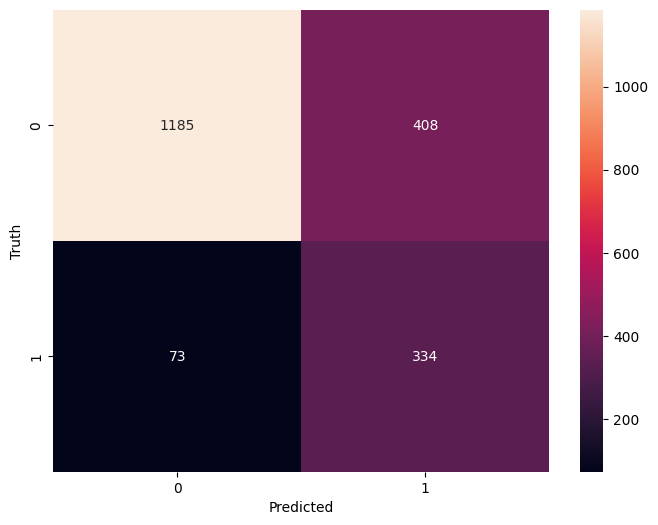

In [66]:
import seaborn as sn
from matplotlib import pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')